In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\Jocelyn\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### LOADING THE REVIEWS DATASETS 

In [2]:
df1=pd.read_csv("2-wheeler-EV-bikewale.csv") #contains reviews of 2 wheeler EVs obtained from bikewale website
df2=pd.read_csv("4-wheeler-EV-cardekho.csv") #contains reviews of 4 wheeler EVs obtained from cardekho website
df3=pd.read_csv("4-wheeler-EV-carwale.csv")  #contains reviews of 4 wheeler EVs obtained from carwale website

In [3]:
df1.shape

(844, 14)

In [4]:
df1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [5]:
df1.shape

(844, 14)

In [6]:
df1.isna().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [7]:
columns_to_delete = ["Extra Features","Maintenance cost"]
df1 = df1.drop(columns=columns_to_delete, axis=1)

In [8]:
# Fill missing values with the mean of the column
df1 = df1.fillna(df1.mean())


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import re
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [10]:
import re
stop_words = stopwords.words('english')
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text=str(text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    text=text.lower()
    return text
df1['review'] = df1['review'].apply(clean)
df1['review']= df1['review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
df1['review']=df1['review'].str.replace('[^\w\s]','')
df1['review']

0      checked bike capacity km full charge given hel...
1      performance poor bike charging problem big thi...
2      purchased april sales staff clueless new vehic...
3      issues come scooty parts available service cen...
4      buy vehicle unless near tvs iqube service cent...
                             ...                        
839    scooty ok motor power less scooter power one p...
840    superb scooty good look many color options les...
841    years condition good years scooter stopped mov...
842    compare scooters best bike comfortable seats d...
843    bike good segment use person aged plus speed l...
Name: review, Length: 844, dtype: object

In [11]:
df1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,checked bike capacity km full charge given hel...,Daily Commute,Never owned,NaN,1,3.0,4.0,3.527536,3.145092,4.0,1.0,TVS iQube
1,performance poor bike charging problem big thi...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,3.527536,1.000000,3.0,3.0,TVS iQube
2,purchased april sales staff clueless new vehic...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,3.527536,2.000000,5.0,2.0,TVS iQube
3,issues come scooty parts available service cen...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,3.527536,1.000000,1.0,1.0,TVS iQube
4,buy vehicle unless near tvs iqube service cent...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,3.527536,1.000000,3.0,2.0,TVS iQube


In [70]:
df1['Used it for'].value_counts()

Daily Commute         600
Everything            160
Occasional Commute     56
Leisure Rides          20
Tours                   8
Name: Used it for, dtype: int64

#### BEHAVIORAL ASPECTS

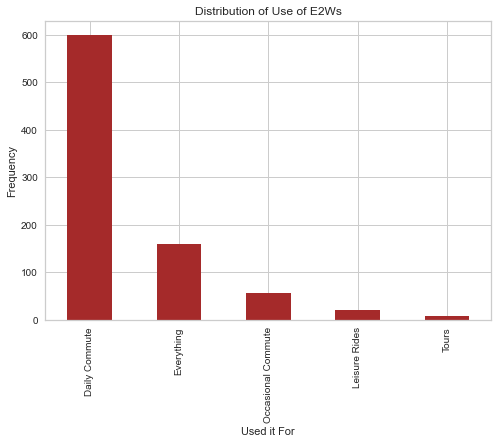

In [85]:
df1['Used it for'].value_counts().plot(kind='bar',color='brown')
plt.xlabel('Used it For')
plt.ylabel('Frequency')
plt.title('Distribution of Use of E2Ws')
plt.show()

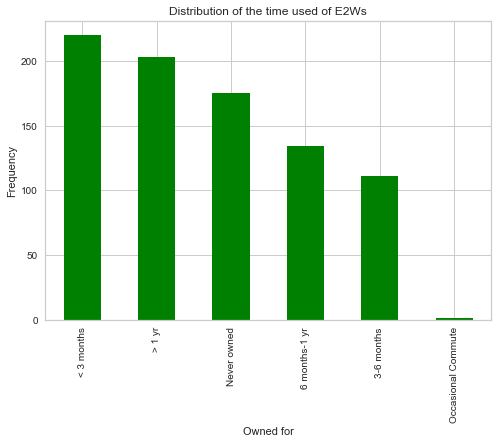

In [94]:
df1['Owned for'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Owned for')
plt.ylabel('Frequency')
plt.title('Distribution of the time used of E2Ws')
plt.show()

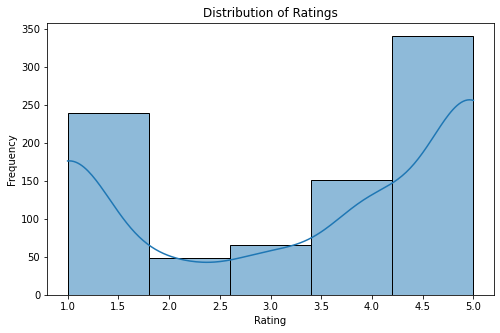

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['rating'], bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


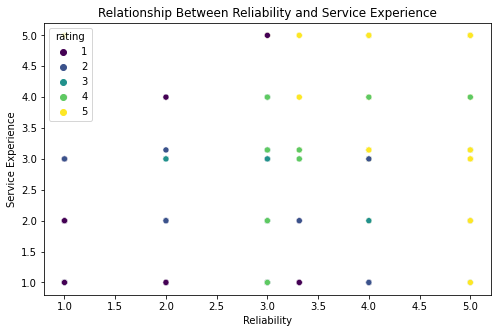

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='Reliability', y='Service Experience', hue='rating', palette='viridis')
plt.xlabel('Reliability')
plt.ylabel('Service Experience')
plt.title('Relationship Between Reliability and Service Experience')
plt.show()


In [14]:
mean_ratings_by_ownership = df1.groupby('Owned for')['rating'].mean().reset_index()
print(mean_ratings_by_ownership)


            Owned for    rating
0          3-6 months  3.333333
1       6 months-1 yr  3.186567
2          < 3 months  3.481818
3              > 1 yr  2.625616
4         Never owned  4.222857
5  Occasional Commute  4.000000


In [15]:
def func(df_new):
    if df_new==3:
        return 0
    elif df_new <3:
        return -1
    else:
        return 1
df1['Target'] = df1['rating'].apply(func)
df1['Target']

0     -1
1     -1
2      0
3     -1
4     -1
      ..
839   -1
840    1
841   -1
842    1
843    1
Name: Target, Length: 844, dtype: int64

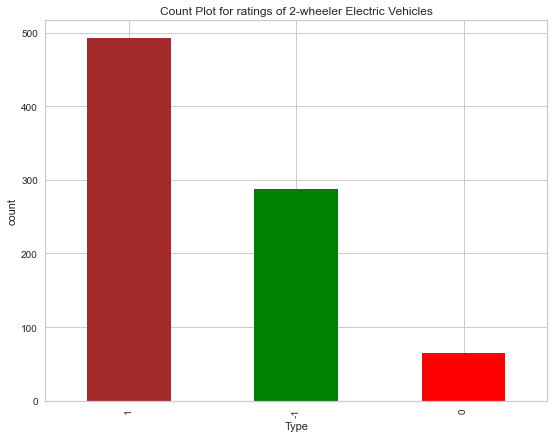

In [84]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
df1.Target.value_counts().plot(kind='bar',color=['brown','green','red'])
plt.xlabel("Type")
plt.ylabel("count")
plt.title("Count Plot for ratings of 2-wheeler Electric Vehicles");

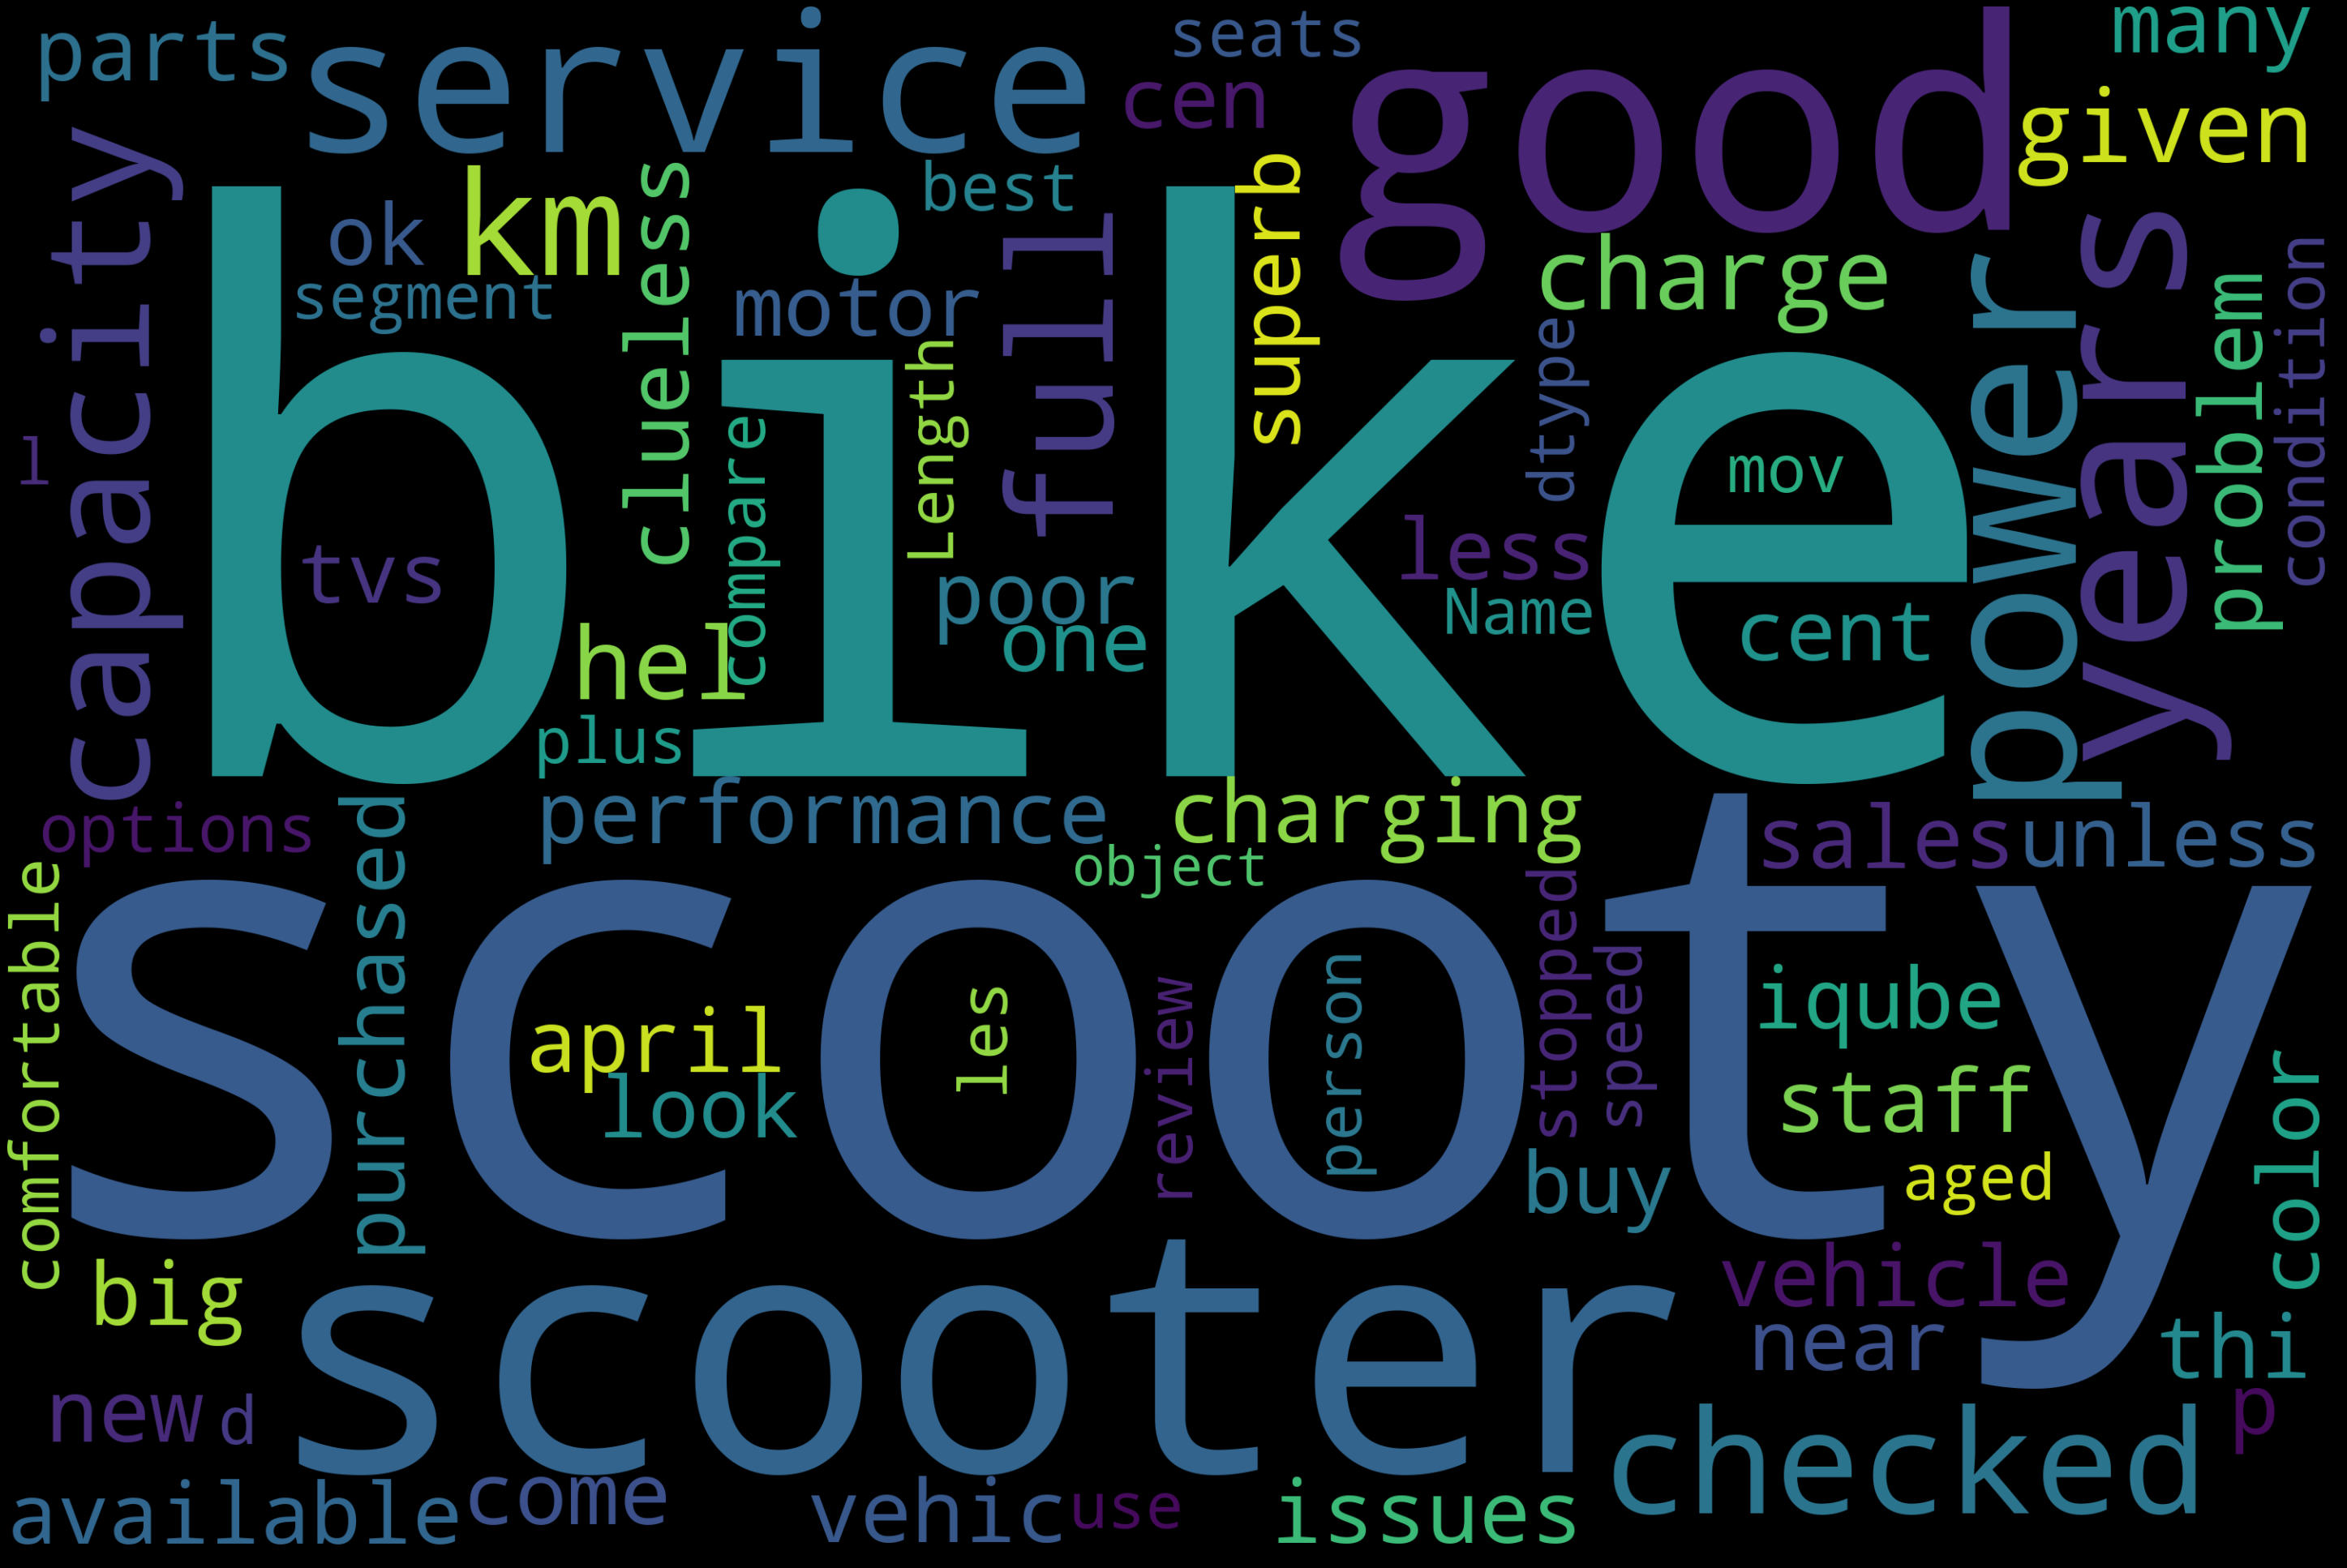

In [17]:
text = df1['review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
df1['review'].dropna(inplace=True)

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df1['Sentiment'] = df1['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jocelyn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


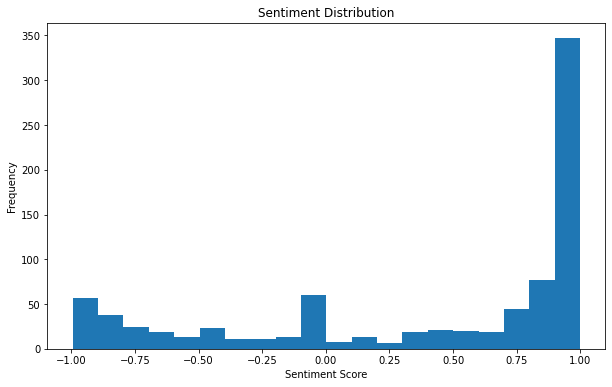

In [20]:
plt.figure(figsize=(10, 6))
df1['Sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [21]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['review'])
X.shape

(844, 4417)

In [23]:
pip install --upgrade scikit-learn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
y=df1['Target']
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 492, -1: 287, 0: 65})
Resampled dataset shape Counter({-1: 492, 0: 492, 1: 492})


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)


In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import plot_confusion_matrix

SVM Accuracy Score ->  93.4959349593496
[[124   1  10]
 [  0 120   3]
 [  4   6 101]]


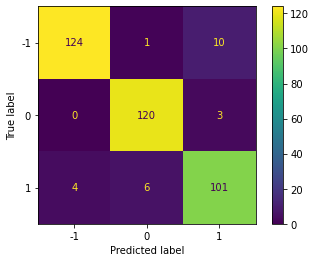

In [31]:
from sklearn import model_selection,svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, Y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Y_test)*100)
cm = confusion_matrix(Y_test, predictions_SVM, labels=SVM.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot()
plt.show()

Logistic Regression Accuracy Score ->  91.32791327913279
[[124   1  10]
 [  0 115   8]
 [  4   9  98]]


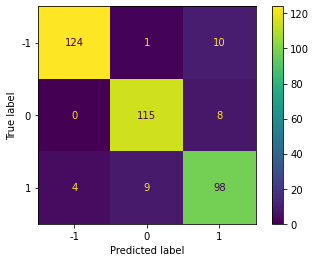

In [29]:
from sklearn.linear_model import LogisticRegression
Logi = LogisticRegression()
Logi.fit(X_train, Y_train)
# predict the labels on validation dataset
predictions_logi = Logi.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_logi, Y_test)*100)
cm = confusion_matrix(Y_test, predictions_logi, labels=Logi.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Logi.classes_)
disp.plot()
plt.show()


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [33]:
df1.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Comfort', 'Value for Money', 'Model Name', 'Target', 'Sentiment'],
      dtype='object')

In [58]:
selected_columns = df1.iloc[:, [5, 6, 9]]
X=selected_columns.values

In [59]:
selected_columns

,Visual Appeal,Reliability,Comfort
0,3.0,4.0,4.000000
1,3.0,1.0,3.000000
2,4.0,4.0,5.000000
3,1.0,1.0,1.000000
4,3.0,4.0,3.000000
...,...,...,...
839,2.0,2.0,2.000000
840,5.0,5.0,3.664151
841,2.0,2.0,3.664151
842,4.0,4.0,4.000000


In [60]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

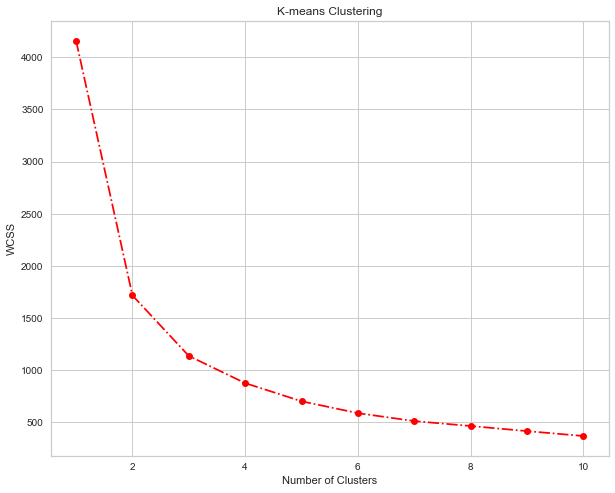

In [61]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

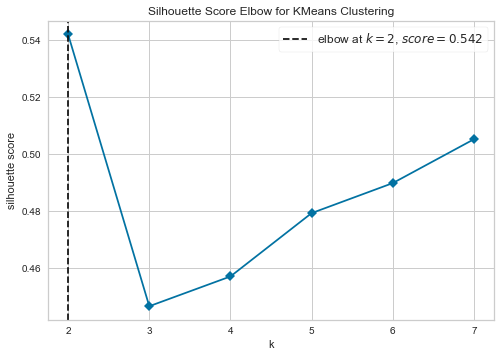

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(X)    
visualizer.poof()

In [63]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_clusters=km.fit_predict(X)

In [64]:

df1['Cluster'] = km.labels_
df1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Target,Sentiment,Cluster
0,checked bike capacity km full charge given hel...,Daily Commute,Never owned,NaN,1,3.0,4.0,3.527536,3.145092,4.0,1.0,TVS iQube,-1,-0.8750,1
1,performance poor bike charging problem big thi...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,3.527536,1.000000,3.0,3.0,TVS iQube,-1,-0.7717,0
2,purchased april sales staff clueless new vehic...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,3.527536,2.000000,5.0,2.0,TVS iQube,0,0.8176,1
3,issues come scooty parts available service cen...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,3.527536,1.000000,1.0,1.0,TVS iQube,-1,-0.4019,0
4,buy vehicle unless near tvs iqube service cent...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,3.527536,1.000000,3.0,2.0,TVS iQube,-1,-0.5719,1


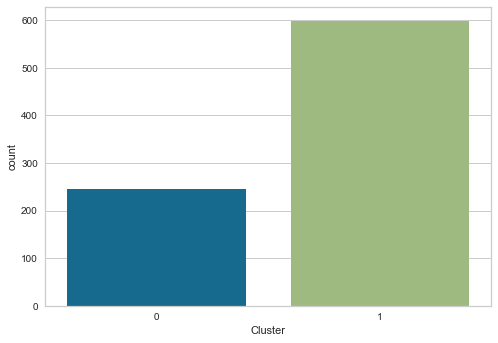

In [65]:
sns.countplot(df1['Cluster'])

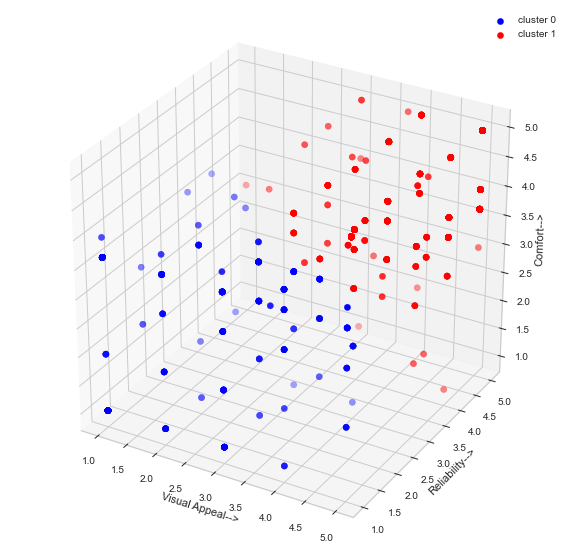

In [68]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'red', label = "cluster 1")
#ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'brown', label = "cluster 2")
ax.set_xlabel('Visual Appeal-->')
ax.set_ylabel('Reliability-->')
ax.set_zlabel('Comfort-->')
ax.legend()
plt.show()